Read the file

In [ ]:
!pip install nltk
!pip install textblob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from collections import Counter
from textblob import TextBlob
import pandas as pd
import re
import matplotlib.pyplot as plt


df1 = pd.read_csv("/content/all_review_clean(2018-2022).csv", index_col=0)

# Reset the index of the DataFrame to avoid ambiguity
df1.reset_index(inplace=True)
df1

,Year,Data_Source,Review
0,2022,Airline Rating,try fly gjt yesterday afternoon fly decade iss...
1,2022,Airline Rating,rude woman desk mad ask check luggage early kn...
2,2022,Airline Rating,normal mile year think ofd remount experience ...
3,2022,Airline Rating,american airline literally ruin trip good angr...
4,2022,Airline Rating,horse airline ont recommend travel american ai...
...,...,...,...
23294,2018,Trustpilot,fine flight attendant nice seat pretty comfort...
23295,2018,Trustpilot,time fly american airline business experience ...
23296,2018,Trustpilot,instance rude service ignore ofll describe ins...
23297,2018,Trustpilot,business class ticket access complimentary pre...


In [ ]:
def remove_plural_s(word):
    # Remove 's' from the end of the word if it exists
    if word.endswith('s'):
        return word[:-1]
    else:
        return word

if __name__ == "__main__":

    # Apply the remove_plural_s function to the 'Review' column
      df1['Review'] = df1['Review'].apply(lambda x: ' '.join([remove_plural_s(word) for word in x.split()]))



## For table of word frequency rank in different years
 the top 20 words for each year along with their frequencies and ranks. The DataFrame will have columns for "Year," "Word," "Frequency," and "Rank.

In [ ]:
import re
from collections import Counter
import pandas as pd



def get_word_frequencies(text):
    # Convert text to lowercase and split it into words
    words = re.findall(r'\w+', text.lower())
    return Counter(words)

def get_top_words(data, top_n=30):
    all_reviews = ' '.join(data['Review'].apply(str))  # Convert the "Review" column to strings
    all_word_frequencies = get_word_frequencies(all_reviews)

    # Get the top N words based on overall frequency
    top_words = dict(all_word_frequencies.most_common(top_n))

    return top_words

# Get the top 30 words and their frequencies
top_words = get_top_words(df1, top_n=100)

# Create a DataFrame to store the top words with their frequency
df_top_words = pd.DataFrame.from_dict(top_words, orient='index', columns=['Overall Frequency'])
df_top_words.reset_index(inplace=True)
df_top_words.rename(columns={'index': 'Word'}, inplace=True)

# Display the DataFrame as a table
print(df_top_words)


        Word  Overall Frequency
0     flight              32807
1    airline              14167
2   american              11472
3        fly               9810
4       time               9397
..       ...                ...
95   finally               1048
96     think               1046
97      able               1042
98      nice               1036
99     night               1022

[100 rows x 2 columns]


# **Word could**

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

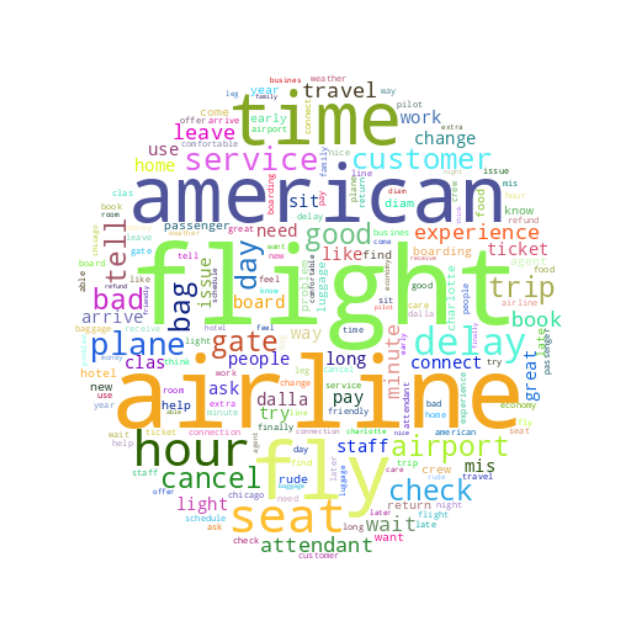

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a larger circular mask for the word cloud
x, y = np.ogrid[:500, :500]
mask = (x - 250) ** 2 + (y - 250) ** 2 > 200 ** 2
mask = 255 * mask.astype(int)

# Convert top_words to a single string
all_words_text = ' '.join(word for word in top_words)

# Generate a word cloud based on the top words and their frequencies with the circular mask
wordcloud = WordCloud(width=500, height=500, background_color="white", repeat=True, mask=mask)

# Generate the word cloud from the word frequencies
wordcloud.generate_from_frequencies(top_words)

# Define custom colors for specific words based on their frequencies
def get_color(word, font_size, position, orientation, random_state=None, **kwargs):
    # Set colors for specific words based on their frequencies
    if word in ['large', 'pink', 'red', 'blue', 'green']:
        return "black"
    elif word in ['word1', 'word2', 'word3']:
        return "purple"
    elif word in ['word4', 'word5']:
        return "orange"
    else:
        return tuple(np.random.randint(0, 256, 3))  # Mix random RGB colors for other words

# Recolor the word cloud using the custom colors
wordcloud.recolor(color_func=get_color)

# Display the generated word cloud (optional)
plt.figure(figsize=(9, 8))  # Set the size of the figure
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

# Save the word cloud as an image (e.g., PNG format)
plt.savefig("word_cloud.png", bbox_inches="tight", pad_inches=0, format="png")

# Show the plot (optional)
plt.show()


In [ ]:
# Export the DataFrame to a CSV file
df_top_words.to_csv("top_words_by_year_and_ranks.csv")

Results
Frequency Analysis

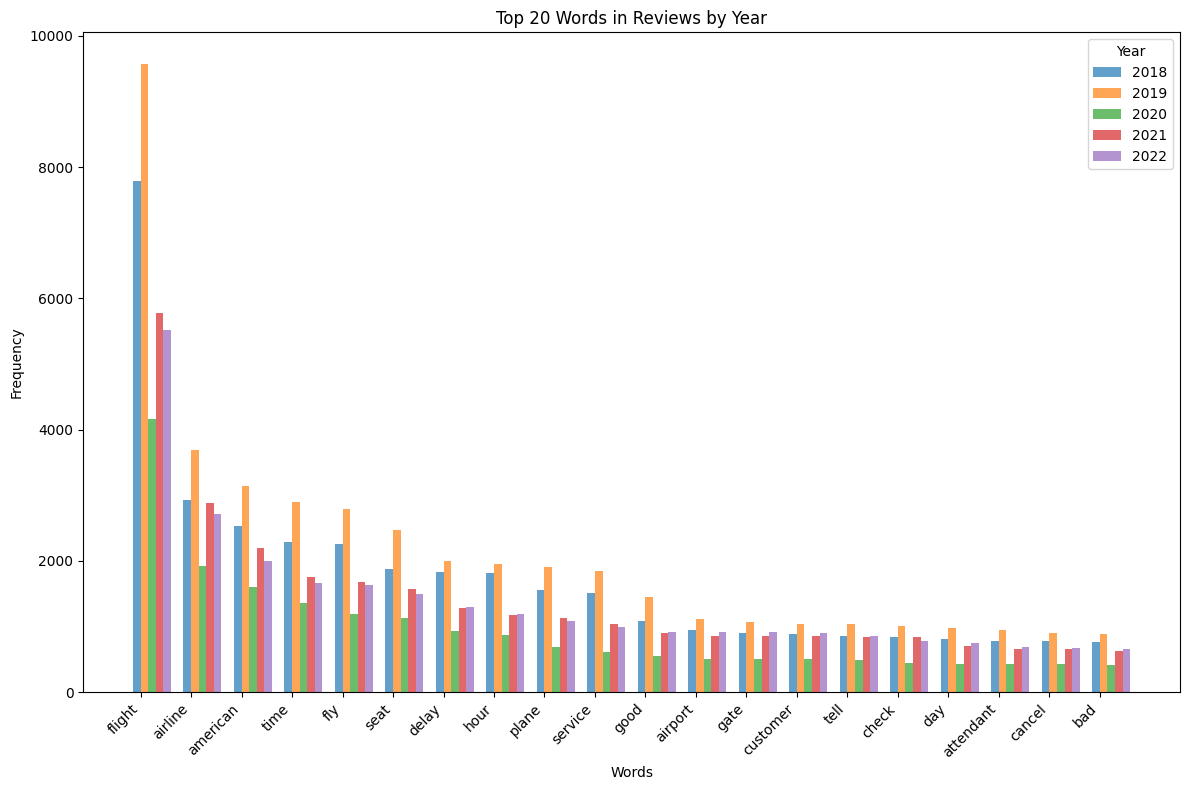

In [ ]:
##############################################Graph will be used in visualisation###############################
# Create a grouped bar chart
plt.figure(figsize=(12, 8))
years = list(top_words_by_year.keys())
word_indices = range(len(list(top_words_by_year[years[0]].keys())))
bar_width = 0.15

for i, year in enumerate(years):
    top_words = top_words_by_year[year]
    plt.bar([index + i * bar_width for index in word_indices],
            top_words.values(),
            bar_width,
            label=str(year),
            alpha=0.7)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Reviews by Year')
plt.legend(title='Year')
plt.xticks([index + 0.5 * bar_width for index in word_indices],
           list(top_words_by_year[years[0]].keys()),
           rotation=45,
           ha='right')
plt.tight_layout()
plt.show()